In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade scikit-learn==1.6.1

In [ ]:
df = pd.read_csv("lung_cancer_survival_data")

In [ ]:
df

,Unnamed: 0,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,0,1768236,67.0,Male,Malta,2018-03-13,Stage IV,2018-03-14,No,Current Smoker,38.0,251.0,0.0,1,0,0,Surgery,2018-10-22,0
1,1,1945457,59.0,Male,Austria,2019-01-06,Stage IV,2019-01-09,No,Never Smoked,19.8,209.0,1.0,1,0,0,Combined,2019-10-02,1
2,2,2272384,78.0,Male,Slovenia,2016-08-20,Stage IV,2016-08-26,No,Former Smoker,39.3,253.0,1.0,0,0,0,Radiation,2017-10-24,0
3,3,2813382,58.0,Male,Denmark,2020-06-06,Stage IV,2020-06-10,Yes,Former Smoker,22.9,180.0,1.0,0,0,0,Chemotherapy,2021-02-05,0
4,4,1697599,50.0,Male,Netherlands,2024-01-26,Stage IV,2024-01-27,Yes,Never Smoked,17.3,227.0,1.0,1,0,0,Surgery,2024-10-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,1042264,67.0,Male,Estonia,2021-09-18,Stage IV,2021-09-21,Yes,Current Smoker,44.8,277.0,1.0,0,0,0,Surgery,2022-12-26,0
199996,199996,260119,64.0,Male,Lithuania,2020-06-17,Stage III,2020-06-29,Yes,Current Smoker,42.6,251.0,1.0,1,0,0,Combined,2021-06-30,0
199997,199997,675852,60.0,Male,Croatia,2019-08-06,Stage IV,2019-08-11,No,Former Smoker,19.7,195.0,0.0,0,0,0,Chemotherapy,2020-06-19,0
199998,199998,272278,52.0,Male,Slovenia,2023-07-06,Stage IV,2023-07-12,Yes,Passive Smoker,28.5,169.0,1.0,1,0,0,Combined,2025-04-14,0


In [ ]:
df.shape

(200000, 19)

In [ ]:
df.head()

,Unnamed: 0,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,0,1768236,67.0,Male,Malta,2018-03-13,Stage IV,2018-03-14,No,Current Smoker,38.0,251.0,0.0,1,0,0,Surgery,2018-10-22,0
1,1,1945457,59.0,Male,Austria,2019-01-06,Stage IV,2019-01-09,No,Never Smoked,19.8,209.0,1.0,1,0,0,Combined,2019-10-02,1
2,2,2272384,78.0,Male,Slovenia,2016-08-20,Stage IV,2016-08-26,No,Former Smoker,39.3,253.0,1.0,0,0,0,Radiation,2017-10-24,0
3,3,2813382,58.0,Male,Denmark,2020-06-06,Stage IV,2020-06-10,Yes,Former Smoker,22.9,180.0,1.0,0,0,0,Chemotherapy,2021-02-05,0
4,4,1697599,50.0,Male,Netherlands,2024-01-26,Stage IV,2024-01-27,Yes,Never Smoked,17.3,227.0,1.0,1,0,0,Surgery,2024-10-21,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   200000 non-null  int64  
 1   id                           200000 non-null  int64  
 2   age                          199672 non-null  float64
 3   gender                       200000 non-null  object 
 4   country                      200000 non-null  object 
 5   diagnosis_date               200000 non-null  object 
 6   cancer_stage                 197556 non-null  object 
 7   beginning_of_treatment_date  200000 non-null  object 
 8   family_history               200000 non-null  object 
 9   smoking_status               199216 non-null  object 
 10  bmi                          198139 non-null  float64
 11  cholesterol_level            199180 non-null  float64
 12  hypertension                 199470 non-null  float64
 13 

In [ ]:
df.describe()

,Unnamed: 0,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,200000.000000,2.000000e+05,199672.000000,198139.000000,199180.000000,199470.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,1.145966e+06,54.971323,30.500248,233.639974,0.749351,0.469250,0.226140,0.087985,0.218305
std,57735.171256,8.968238e+05,9.993551,8.376869,43.431520,0.433388,0.499055,0.418332,0.283274,0.413097
min,0.000000,7.000000e+00,12.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49999.750000,3.922185e+05,48.000000,23.200000,196.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99999.500000,9.101060e+05,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,149999.250000,1.697014e+06,62.000000,37.800000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,199999.000000,3.249983e+06,97.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.drop(columns=['Unnamed: 0'],axis=0,inplace=True)

In [ ]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1768236,67.0,Male,Malta,2018-03-13,Stage IV,2018-03-14,No,Current Smoker,38.0,251.0,0.0,1,0,0,Surgery,2018-10-22,0
1,1945457,59.0,Male,Austria,2019-01-06,Stage IV,2019-01-09,No,Never Smoked,19.8,209.0,1.0,1,0,0,Combined,2019-10-02,1
2,2272384,78.0,Male,Slovenia,2016-08-20,Stage IV,2016-08-26,No,Former Smoker,39.3,253.0,1.0,0,0,0,Radiation,2017-10-24,0
3,2813382,58.0,Male,Denmark,2020-06-06,Stage IV,2020-06-10,Yes,Former Smoker,22.9,180.0,1.0,0,0,0,Chemotherapy,2021-02-05,0
4,1697599,50.0,Male,Netherlands,2024-01-26,Stage IV,2024-01-27,Yes,Never Smoked,17.3,227.0,1.0,1,0,0,Surgery,2024-10-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1042264,67.0,Male,Estonia,2021-09-18,Stage IV,2021-09-21,Yes,Current Smoker,44.8,277.0,1.0,0,0,0,Surgery,2022-12-26,0
199996,260119,64.0,Male,Lithuania,2020-06-17,Stage III,2020-06-29,Yes,Current Smoker,42.6,251.0,1.0,1,0,0,Combined,2021-06-30,0
199997,675852,60.0,Male,Croatia,2019-08-06,Stage IV,2019-08-11,No,Former Smoker,19.7,195.0,0.0,0,0,0,Chemotherapy,2020-06-19,0
199998,272278,52.0,Male,Slovenia,2023-07-06,Stage IV,2023-07-12,Yes,Passive Smoker,28.5,169.0,1.0,1,0,0,Combined,2025-04-14,0


In [ ]:
#Convert date columns to datetime
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])
df['beginning_of_treatment_date'] = pd.to_datetime(df['beginning_of_treatment_date'])

In [ ]:
df

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1768236,67.0,Male,Malta,2018-03-13,Stage IV,2018-03-14,No,Current Smoker,38.0,251.0,0.0,1,0,0,Surgery,2018-10-22,0
1,1945457,59.0,Male,Austria,2019-01-06,Stage IV,2019-01-09,No,Never Smoked,19.8,209.0,1.0,1,0,0,Combined,2019-10-02,1
2,2272384,78.0,Male,Slovenia,2016-08-20,Stage IV,2016-08-26,No,Former Smoker,39.3,253.0,1.0,0,0,0,Radiation,2017-10-24,0
3,2813382,58.0,Male,Denmark,2020-06-06,Stage IV,2020-06-10,Yes,Former Smoker,22.9,180.0,1.0,0,0,0,Chemotherapy,2021-02-05,0
4,1697599,50.0,Male,Netherlands,2024-01-26,Stage IV,2024-01-27,Yes,Never Smoked,17.3,227.0,1.0,1,0,0,Surgery,2024-10-21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1042264,67.0,Male,Estonia,2021-09-18,Stage IV,2021-09-21,Yes,Current Smoker,44.8,277.0,1.0,0,0,0,Surgery,2022-12-26,0
199996,260119,64.0,Male,Lithuania,2020-06-17,Stage III,2020-06-29,Yes,Current Smoker,42.6,251.0,1.0,1,0,0,Combined,2021-06-30,0
199997,675852,60.0,Male,Croatia,2019-08-06,Stage IV,2019-08-11,No,Former Smoker,19.7,195.0,0.0,0,0,0,Chemotherapy,2020-06-19,0
199998,272278,52.0,Male,Slovenia,2023-07-06,Stage IV,2023-07-12,Yes,Passive Smoker,28.5,169.0,1.0,1,0,0,Combined,2025-04-14,0


In [ ]:
df.dtypes

,0
id,int64
age,float64
gender,object
country,object
diagnosis_date,datetime64[ns]
cancer_stage,object
beginning_of_treatment_date,datetime64[ns]
family_history,object
smoking_status,object
bmi,float64


In [ ]:
#Checking for null values
df.isnull().sum()

,0
id,0
age,328
gender,0
country,0
diagnosis_date,0
cancer_stage,2444
beginning_of_treatment_date,0
family_history,0
smoking_status,784
bmi,1861


In [ ]:
df.isnull().mean()

,0
id,0.000000
age,0.001640
gender,0.000000
country,0.000000
diagnosis_date,0.000000
cancer_stage,0.012220
beginning_of_treatment_date,0.000000
family_history,0.000000
smoking_status,0.003920
bmi,0.009305


In [ ]:
#feature engineering
#Imputing missing values in numerical features
columns_to_fill_1 = ['age','bmi','cholesterol_level']
imputer1 = SimpleImputer(strategy='median')
df[columns_to_fill_1]=imputer1.fit_transform(df[columns_to_fill_1])

#Imputing missing values in categorical features
columns_to_fill_2 = ['cancer_stage','smoking_status','hypertension']
imputer2 = SimpleImputer(strategy='most_frequent')
df[columns_to_fill_2]=imputer2.fit_transform(df[columns_to_fill_2])

In [ ]:
#Checking for null values
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
beginning_of_treatment_date,0
family_history,0
smoking_status,0
bmi,0


In [ ]:
#Check for duplicate values
df.duplicated().sum()

0


EXPLORATORY DATA ANALYSIS


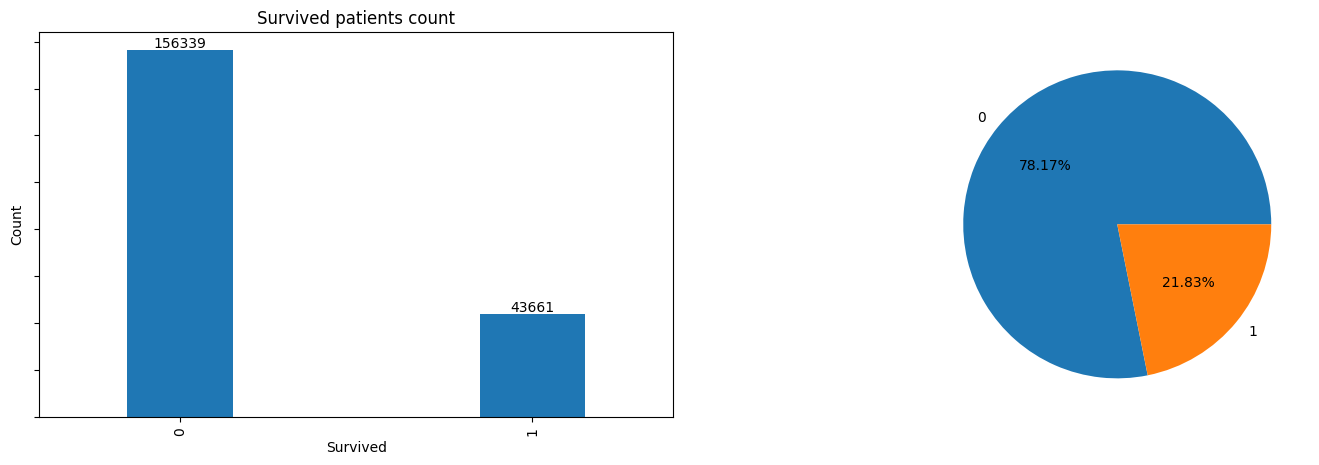

In [ ]:
#Target Visualization
count = df["survived"].value_counts()
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
count.plot(kind="bar", ax=axes[0],width=0.3)
for container in axes[0].containers:
    axes[0].bar_label(container,fmt='%d')
axes[0].set_yticklabels(())
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Survived")
axes[0].set_title("Survived patients count")
count.plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

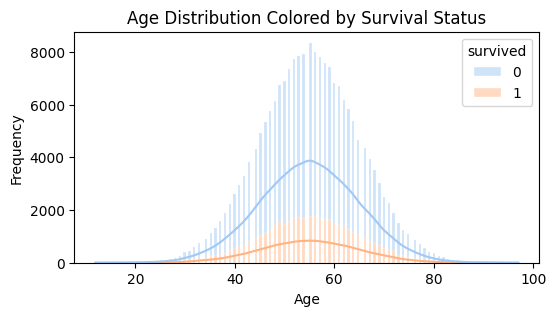

In [ ]:
#Age distribution by Survival Status
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='age', hue='survived', multiple='stack', palette='pastel', kde=True,edgecolor="white")
plt.title('Age Distribution Colored by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

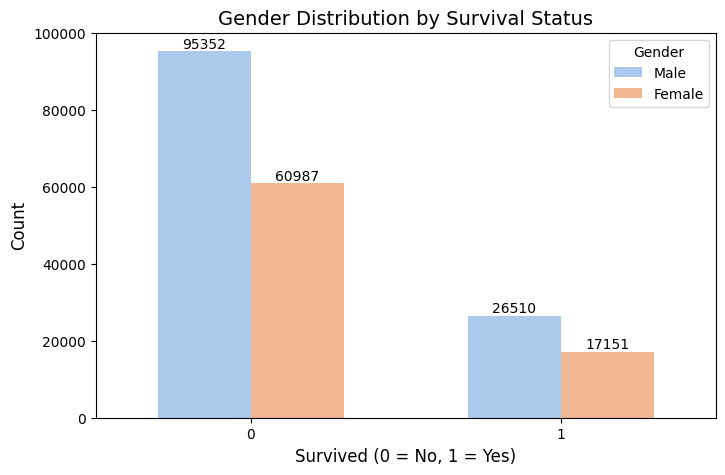

In [ ]:
#Gender Distribution by Survival Status
# Set up the figure
plt.figure(figsize=(8, 5))

# Create a count plot
plot = sns.countplot(data=df, x='survived', hue='gender', palette='pastel',width=0.6)

for bar in plot.patches:
    # Get bar coordinates and height
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y > 0:  # Add annotation only if the bar has a height
        plot.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5),
                      textcoords='offset points', ha='center', va='center', fontsize=10)

# Customize the plot
plt.title('Gender Distribution by Survival Status', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', loc='upper right')

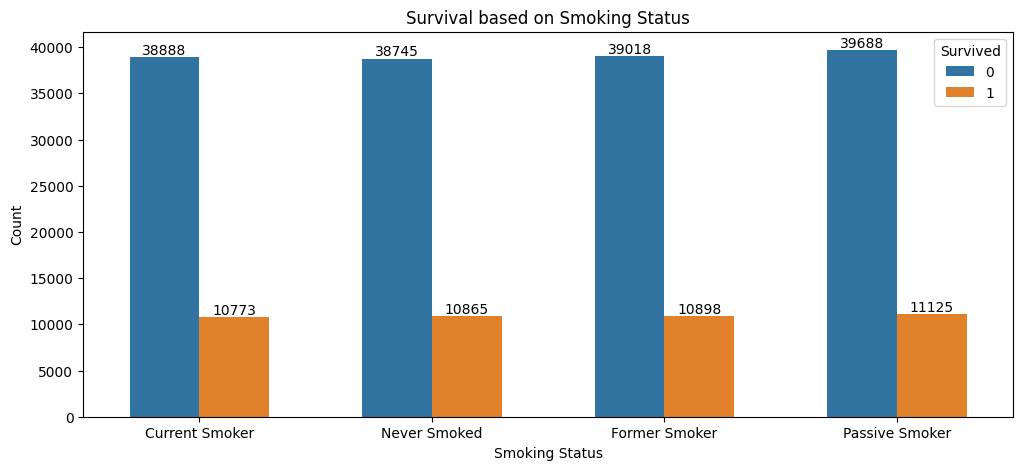

In [ ]:
#smoking status Distribution by Survival Status
# Set up the figure
plt.figure(figsize=(12, 5))
plot = sns.countplot(data=df, x='smoking_status', hue='survived',width=0.6)

for bar in plot.patches:
    # Get bar coordinates and height
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y > 0:  # Add annotation only if the bar has a height
        plot.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5),
                      textcoords='offset points', ha='center', va='center', fontsize=10)
plt.title('Survival based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

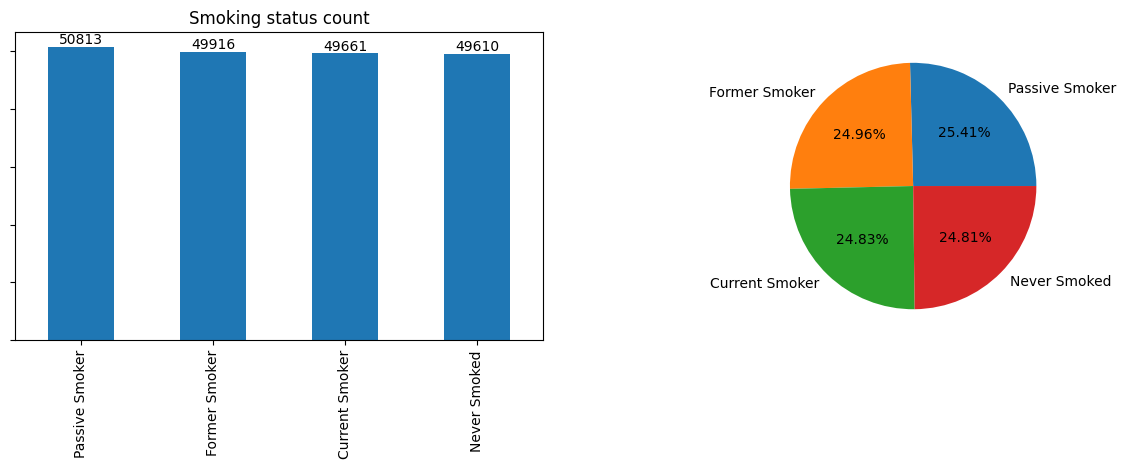

In [ ]:
#Smoking status distribution
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
df["smoking_status"].value_counts().plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Smoking status count")
df["smoking_status"].value_counts().plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

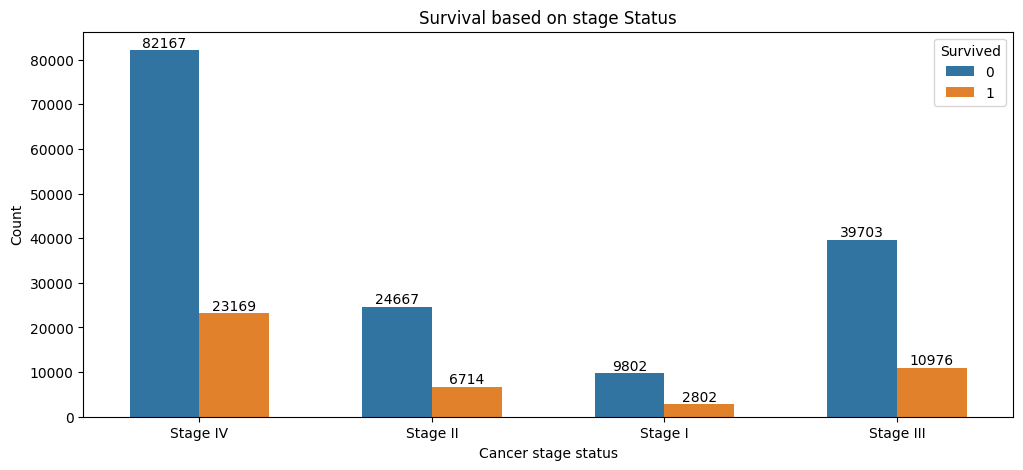

In [ ]:
#Cancer Stage Distribution by Survival Status
plt.figure(figsize=(12, 5))
plot = sns.countplot(data=df, x='cancer_stage', hue='survived',width=0.6)

for bar in plot.patches:
    # Get bar coordinates and height
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y > 0:  # Add annotation only if the bar has a height
        plot.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5),
                      textcoords='offset points', ha='center', va='center', fontsize=10)


plt.title('Survival based on stage Status')
plt.xlabel('Cancer stage status')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

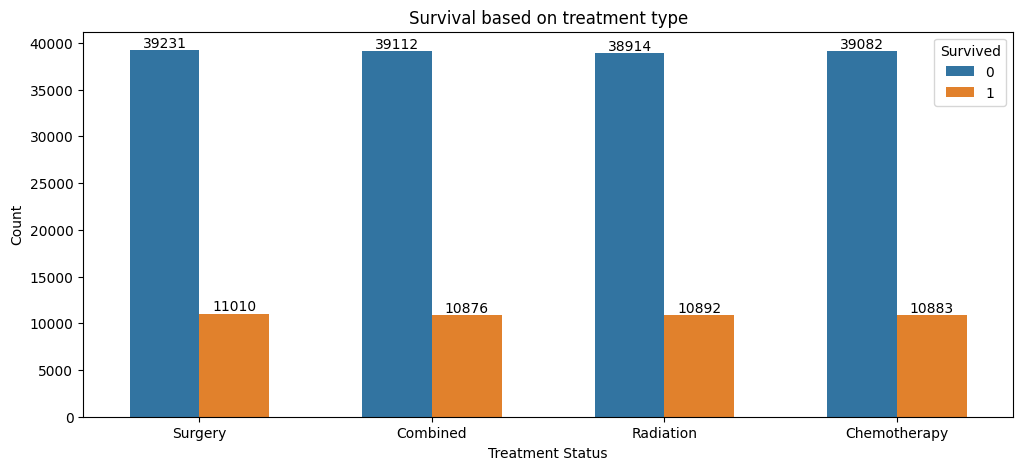

In [ ]:
#Treatment Type Distribution by Survival Status
plt.figure(figsize=(12, 5))
plot = sns.countplot(data=df, x='treatment_type', hue='survived',width=0.6)

for bar in plot.patches:
    # Get bar coordinates and height
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y > 0:  # Add annotation only if the bar has a height
        plot.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5),
                      textcoords='offset points', ha='center', va='center', fontsize=10)

plt.title('Survival based on treatment type')
plt.xlabel('Treatment Status')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

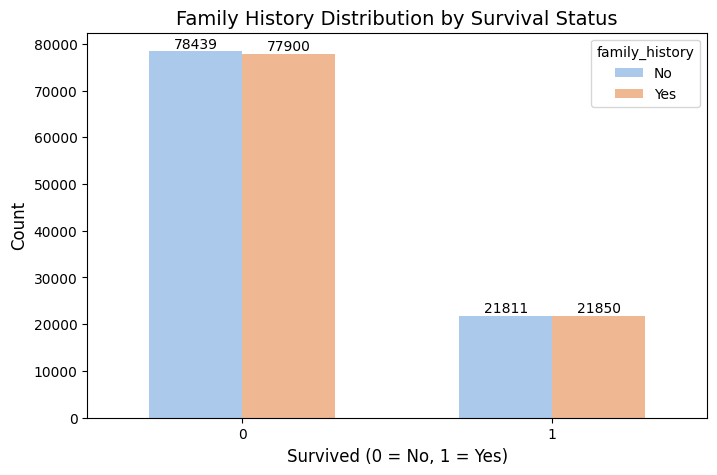

In [ ]:
#Family Distribution by Survival Status
plt.figure(figsize=(8, 5))

# Create a count plot
plot = sns.countplot(data=df, x='survived', hue='family_history', palette='pastel',width=0.6)

for bar in plot.patches:
    # Get bar coordinates and height
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    if y > 0:  # Add annotation only if the bar has a height
        plot.annotate(f'{int(y)}', xy=(x, y), xytext=(0, 5),
                      textcoords='offset points', ha='center', va='center', fontsize=10)

# Customize the plot
plt.title('Family History Distribution by Survival Status', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='family_history', loc='upper right')

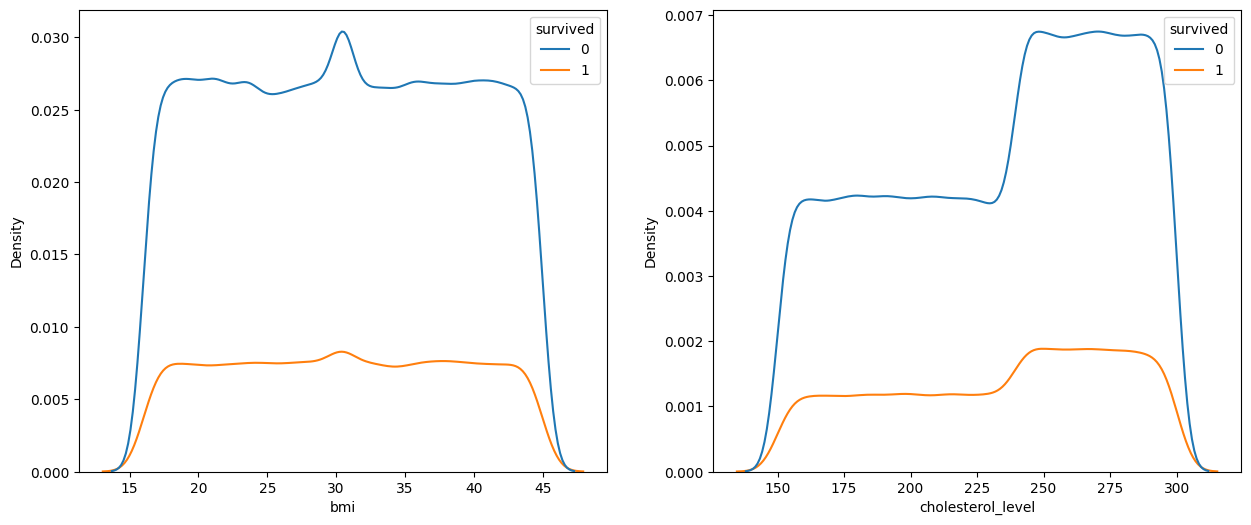

In [ ]:
#BMI and Cholesterol levels distribution by Survival Status
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.kdeplot(df, x="bmi", hue="survived", ax=axes[0])
sns.kdeplot(df, x="cholesterol_level", hue="survived", ax=axes[1])
plt.show()

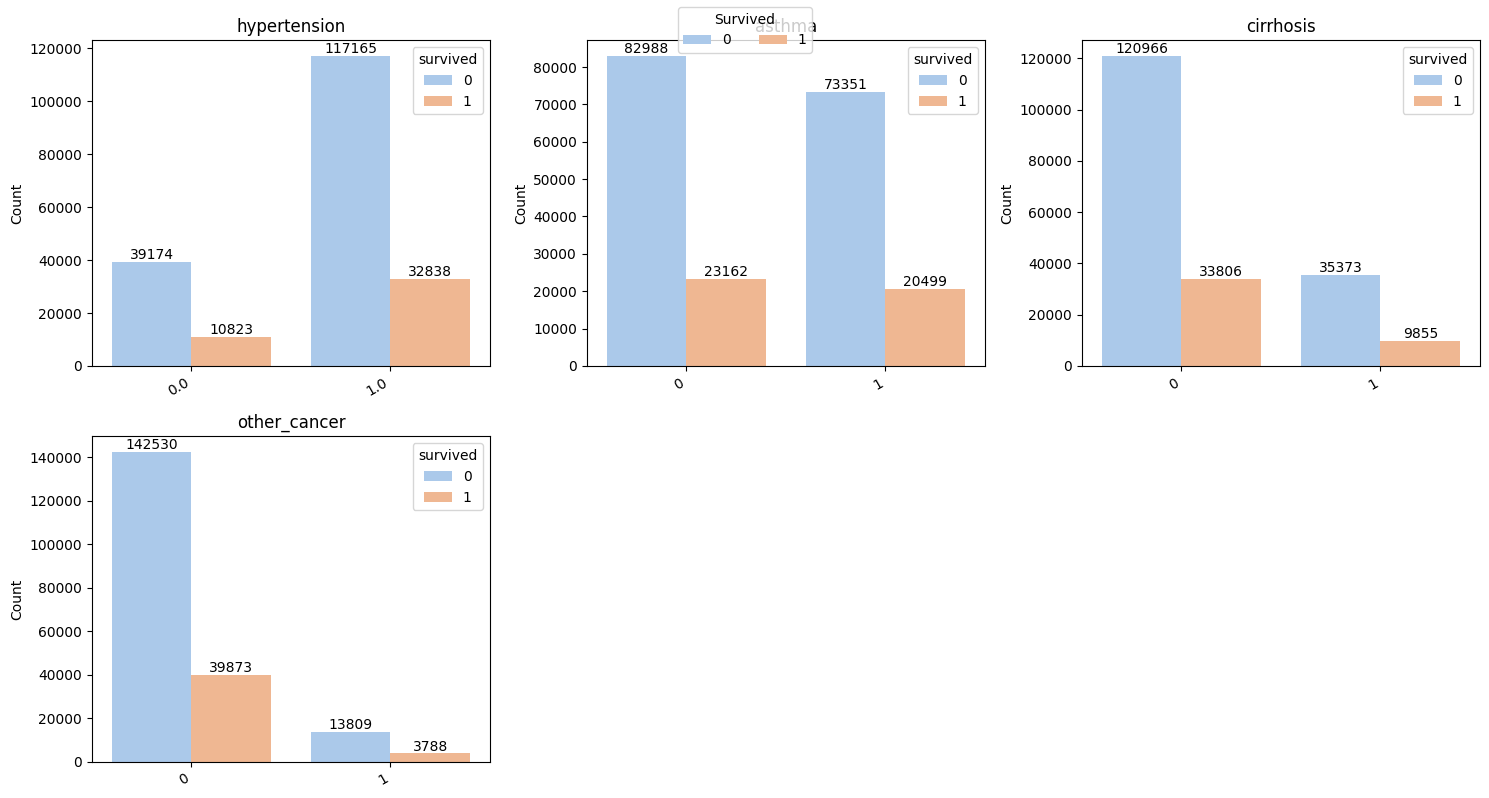

In [ ]:
# hypertension , BMI, asthma,cirrhosis,other_cancer distribution
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']
# Reshape the data
melted_df = df.melt(id_vars='survived', value_vars=variables)

# Set up the figure with subplots
num_vars = len(variables)
cols = 3  # Number of columns in the grid
rows = (num_vars + cols - 1) // cols  # Calculate rows dynamically
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=False)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot countplots for each variable
for i, var in enumerate(variables):
    ax = axes[i]
    sns.countplot(
        data=melted_df[melted_df['variable'] == var],
        x='value',
        hue='survived',
        palette='pastel',
        dodge=True,
        ax=ax
    )
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    # Add counts on top of the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')
    # Set titles and labels
    ax.set_title(var)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Hide unused subplots if variables < total subplots
for j in range(len(variables), len(axes)):
    axes[j].axis('off')

# Add a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Survived', loc='upper center', ncol=2)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Feature Engineering

In [ ]:
# Encoding Categorical Features
#ordinal encoding of Cancer Stage ,  Smoking Status, Treatment Type
columns_to_encode_1 = ['cancer_stage','smoking_status','treatment_type']
oe = OrdinalEncoder(categories=[['Stage I','Stage II','Stage III','Stage IV'],
                                ['Never Smoked','Former Smoker','Passive Smoker','Current Smoker'],
                                ['Surgery','Radiation','Chemotherapy','Combined']])
oetransform = oe.fit_transform(df[columns_to_encode_1])
df[columns_to_encode_1]=oetransform

# one hot encoding on categorical features
columns_to_encode_2 = ['gender','family_history']
ohe = OneHotEncoder(sparse_output=False,drop='first')
ohetransform = ohe.fit_transform(df[columns_to_encode_2])
df_ohe=pd.DataFrame(ohetransform,columns=ohe.get_feature_names_out(columns_to_encode_2))

df_1=pd.concat([df,df_ohe],axis=1)
df_1

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,gender_Male,family_history_Yes
0,1768236,67.0,Male,Malta,2018-03-13,3.0,2018-03-14,No,3.0,38.0,251.0,0.0,1,0,0,0.0,2018-10-22,0,1.0,0.0
1,1945457,59.0,Male,Austria,2019-01-06,3.0,2019-01-09,No,0.0,19.8,209.0,1.0,1,0,0,3.0,2019-10-02,1,1.0,0.0
2,2272384,78.0,Male,Slovenia,2016-08-20,3.0,2016-08-26,No,1.0,39.3,253.0,1.0,0,0,0,1.0,2017-10-24,0,1.0,0.0
3,2813382,58.0,Male,Denmark,2020-06-06,3.0,2020-06-10,Yes,1.0,22.9,180.0,1.0,0,0,0,2.0,2021-02-05,0,1.0,1.0
4,1697599,50.0,Male,Netherlands,2024-01-26,3.0,2024-01-27,Yes,0.0,17.3,227.0,1.0,1,0,0,0.0,2024-10-21,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1042264,67.0,Male,Estonia,2021-09-18,3.0,2021-09-21,Yes,3.0,44.8,277.0,1.0,0,0,0,0.0,2022-12-26,0,1.0,1.0
199996,260119,64.0,Male,Lithuania,2020-06-17,2.0,2020-06-29,Yes,3.0,42.6,251.0,1.0,1,0,0,3.0,2021-06-30,0,1.0,1.0
199997,675852,60.0,Male,Croatia,2019-08-06,3.0,2019-08-11,No,1.0,19.7,195.0,0.0,0,0,0,2.0,2020-06-19,0,1.0,0.0
199998,272278,52.0,Male,Slovenia,2023-07-06,3.0,2023-07-12,Yes,2.0,28.5,169.0,1.0,1,0,0,3.0,2025-04-14,0,1.0,1.0


In [ ]:
# Calculate the treatment delay (time between diagnosis and start of treatment)
df_1['treatment_delay_days'] = (df_1['beginning_of_treatment_date']-df_1['diagnosis_date']).dt.days

# Calculate the duration of treatment in days
df_1['treatment_duration_days'] = (df_1['end_treatment_date']-df_1['beginning_of_treatment_date']).dt.days

In [ ]:
df_1.drop(['id','gender','country','diagnosis_date','beginning_of_treatment_date',
               'end_treatment_date','family_history'],axis=1,inplace=True)

In [ ]:
df_1

,age,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,gender_Male,family_history_Yes,treatment_delay_days,treatment_duration_days
0,67.0,3.0,3.0,38.0,251.0,0.0,1,0,0,0.0,0,1.0,0.0,1,222
1,59.0,3.0,0.0,19.8,209.0,1.0,1,0,0,3.0,1,1.0,0.0,3,266
2,78.0,3.0,1.0,39.3,253.0,1.0,0,0,0,1.0,0,1.0,0.0,6,424
3,58.0,3.0,1.0,22.9,180.0,1.0,0,0,0,2.0,0,1.0,1.0,4,240
4,50.0,3.0,0.0,17.3,227.0,1.0,1,0,0,0.0,0,1.0,1.0,1,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,67.0,3.0,3.0,44.8,277.0,1.0,0,0,0,0.0,0,1.0,1.0,3,461
199996,64.0,2.0,3.0,42.6,251.0,1.0,1,0,0,3.0,0,1.0,1.0,12,366
199997,60.0,3.0,1.0,19.7,195.0,0.0,0,0,0,2.0,0,1.0,0.0,5,313
199998,52.0,3.0,2.0,28.5,169.0,1.0,1,0,0,3.0,0,1.0,1.0,6,642


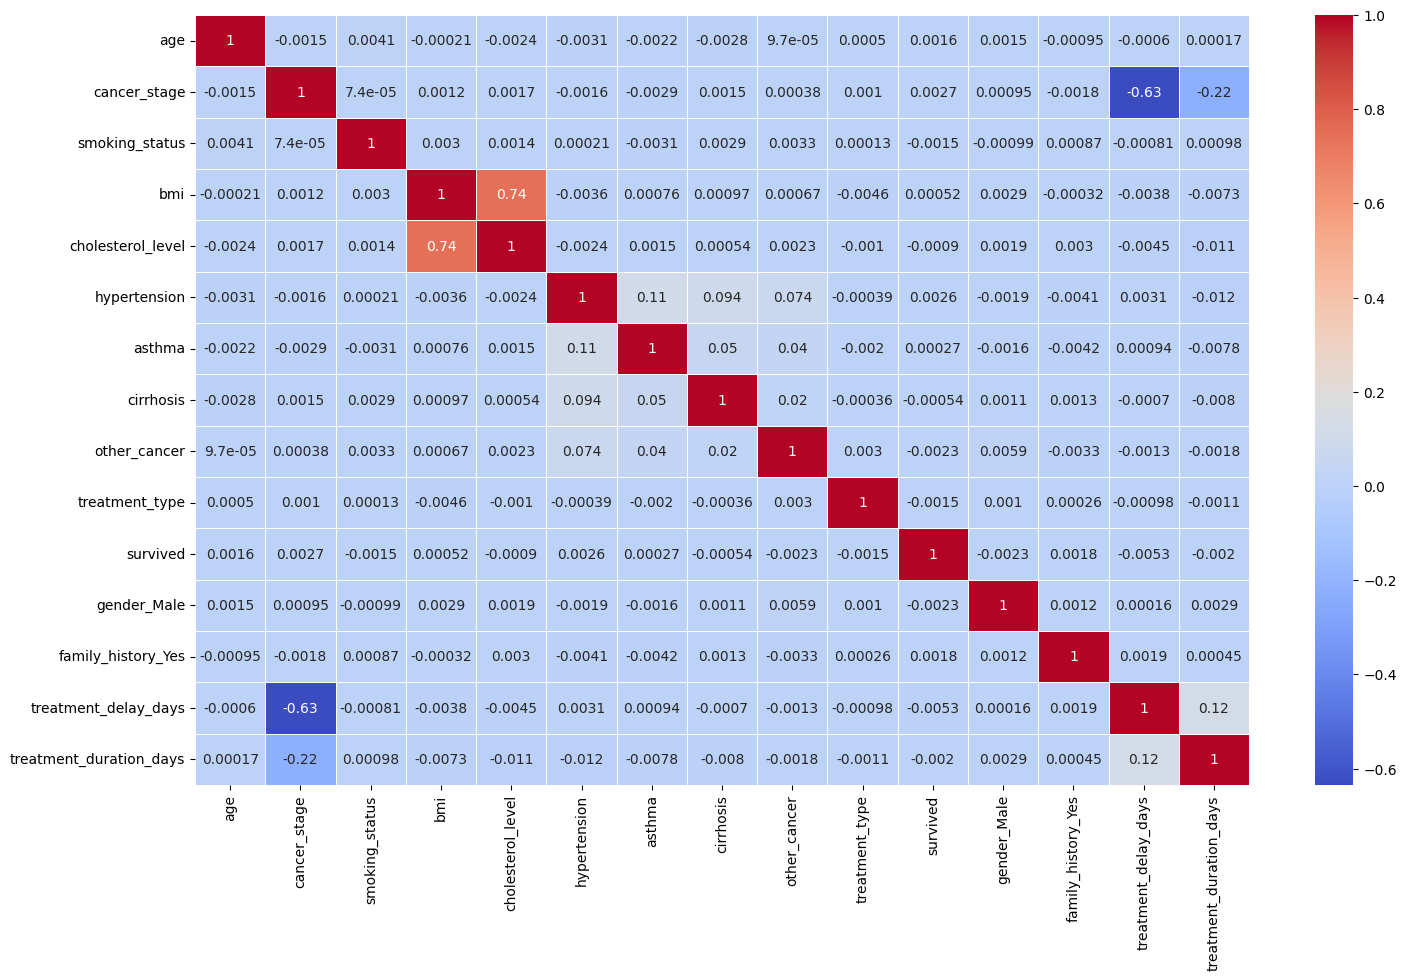

In [ ]:
#visualization of features correlation
correlation_matrix = df_1.corr()
plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=0.7)
plt.show()

Model Traning and Evaluation

In [ ]:
X = df_1.drop(['survived'],axis=1)
y = df_1['survived']

In [ ]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)

In [ ]:
X_train

,age,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,gender_Male,family_history_Yes,treatment_delay_days,treatment_duration_days
147773,51.0,3.0,1.0,25.1,183.0,1.0,0,1,0,0.0,0.0,1.0,7,449
102450,57.0,3.0,1.0,26.0,174.0,1.0,0,1,0,2.0,1.0,1.0,1,674
108757,47.0,0.0,2.0,42.1,293.0,1.0,0,0,0,3.0,0.0,0.0,5,498
107808,45.0,2.0,0.0,25.5,186.0,1.0,0,0,0,2.0,0.0,0.0,3,691
57312,60.0,2.0,0.0,27.4,167.0,1.0,1,0,0,3.0,0.0,0.0,14,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92270,46.0,3.0,0.0,44.6,243.0,1.0,0,0,0,3.0,1.0,1.0,7,529
183576,52.0,3.0,1.0,32.1,254.0,1.0,0,0,0,3.0,1.0,0.0,7,353
16071,63.0,3.0,0.0,42.9,247.0,1.0,0,0,0,1.0,0.0,0.0,5,441
182262,47.0,3.0,1.0,44.4,242.0,1.0,1,0,0,1.0,0.0,1.0,2,610


In [ ]:
y_train

,survived
147773,0
102450,1
108757,1
107808,1
57312,0
...,...
92270,0
183576,0
16071,0
182262,1


In [ ]:
X_test

,age,cancer_stage,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,gender_Male,family_history_Yes,treatment_delay_days,treatment_duration_days
114444,56.0,3.0,3.0,24.5,209.0,1.0,1,0,0,3.0,1.0,0.0,4,387
34214,55.0,3.0,0.0,31.3,244.0,1.0,0,0,0,1.0,1.0,1.0,5,542
179382,50.0,3.0,2.0,35.9,267.0,0.0,0,0,0,3.0,1.0,0.0,6,369
156207,60.0,3.0,3.0,38.3,276.0,1.0,0,0,0,1.0,1.0,1.0,1,349
62982,49.0,1.0,3.0,32.1,264.0,1.0,1,0,0,2.0,0.0,1.0,3,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25103,54.0,3.0,1.0,28.3,174.0,1.0,0,0,0,2.0,1.0,0.0,3,454
31481,55.0,2.0,0.0,16.1,190.0,1.0,0,1,0,1.0,1.0,1.0,14,453
62938,55.0,3.0,3.0,37.3,272.0,1.0,1,0,0,1.0,1.0,0.0,1,383
103288,59.0,3.0,0.0,27.7,160.0,0.0,1,0,0,3.0,0.0,1.0,2,445


In [ ]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[-0.39717949,  0.80785538, -0.45301597, ...,  1.0052471 ,
         0.04978816,  0.18183782],
       [ 0.20319386,  0.80785538, -0.45301597, ...,  1.0052471 ,
        -1.07427428,  1.83244129],
       [-0.79742839, -2.3949191 ,  0.44305465, ..., -0.99478029,
        -0.32489932,  0.54130257],
       ...,
       [ 0.8035672 ,  0.80785538, -1.34908659, ..., -0.99478029,
        -0.32489932,  0.12314969],
       [-0.79742839,  0.80785538, -0.45301597, ...,  1.0052471 ,
        -0.88693054,  1.3629363 ],
       [ 0.10313163, -1.32732761,  0.44305465, ..., -0.99478029,
         1.36119434, -0.42705147]])

In [ ]:
X_test

array([[ 0.10283769,  0.80796956,  1.34939745, ..., -1.00160128,
        -0.51361216, -0.27621863],
       [ 0.00256326,  0.80796956, -1.34620765, ...,  0.99840128,
        -0.32723042,  0.86031268],
       [-0.49880884,  0.80796956,  0.45086242, ..., -1.00160128,
        -0.14084868, -0.40820291],
       ...,
       [ 0.00256326,  0.80796956,  1.34939745, ..., -1.00160128,
        -1.07275738, -0.30554847],
       [ 0.40366095,  0.80796956, -1.34620765, ...,  0.99840128,
        -0.88637564,  0.14906405],
       [ 1.50667958,  0.80796956, -1.34620765, ..., -1.00160128,
        -0.88637564,  0.6550038 ]])

Applying SMOTE to deal with class imbalance

In [ ]:
smote = SMOTE()
print("Before: ", Counter(y_train))
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("After: ", Counter(y_train_resampled))


Before:  Counter({0: 93803, 1: 26197})
After:  Counter({0: 93803, 1: 93803})


1.Logistic Regression

In [ ]:
#1.1. Logistic Regression
# Initialize the model
log_model = LogisticRegression()

# Train the model
log_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

# Calculate accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy_log)

# Generate classification report
print(classification_report(y_test, y_pred_log))

# Generate confusion matrix
print(confusion_matrix(y_test, y_pred_log))

Accuracy: 0.4657
              precision    recall  f1-score   support

           0       0.78      0.44      0.56     62536
           1       0.22      0.56      0.31     17464

    accuracy                           0.47     80000
   macro avg       0.50      0.50      0.44     80000
weighted avg       0.66      0.47      0.51     80000

[[27429 35107]
 [ 7637  9827]]


In [ ]:
# 1.2 Logistic regression with hyperparamter tuning

# Define the model
log_model = LogisticRegression()

# Define the parameter grid
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 20),  # Range of C values to explore
    'solver': ['liblinear', 'saga'],  # Solvers to consider
    'max_iter': [100, 200, 300]  # Maximum number of iterations for the solver
}

# Set up the random search
random_search = RandomizedSearchCV(log_model, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the random search
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print(f'Best parameters: {random_search.best_params_}')
print(f'Best accuracy: {random_search.best_score_:.2f}')

# Make predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'C': 0.0006951927961775605}
Best accuracy: 0.52
Confusion Matrix:
[[29584 32952]
 [ 8271  9193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.47      0.59     62536
           1       0.22      0.53      0.31     17464

    accuracy                           0.48     80000
   macro avg       0.50      0.50      0.45     80000
weighted avg       0.66      0.48      0.53     80000



2.Extra tree Classifier

In [ ]:
# 2.1. Extra Trees Classifier (Basic)
# Initialize the model
extra_trees_model = ExtraTreesClassifier(n_estimators=100,random_state=42)

# Train the model
extra_trees_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_extra_trees = extra_trees_model.predict(X_test)

# Evaluate the model
# Calculate accuracy
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
print("Accuracy:", accuracy_extra_trees)

# Generate classification report
print(classification_report(y_test, y_pred_extra_trees))

# Generate confusion matrix
print(confusion_matrix(y_test, y_pred_extra_trees))

Accuracy: 0.6907125
              precision    recall  f1-score   support

           0       0.78      0.84      0.81     62536
           1       0.22      0.16      0.18     17464

    accuracy                           0.69     80000
   macro avg       0.50      0.50      0.50     80000
weighted avg       0.66      0.69      0.67     80000

[[52485 10051]
 [14692  2772]]


In [ ]:
#2.2 Extra tree classifier with hyperparameter tuning
# Define the model
extra_trees_model = ExtraTreesClassifier(random_state=42)


# Define the parameter grid
param_dist = {
    'n_estimators': [50,80,100],
    'max_depth': [5,10,15],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [2,3,4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']

}

# Set up the random search
random_search = RandomizedSearchCV( extra_trees_model,param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the random search
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print(f'Best parameters: {random_search.best_params_}')
print(f'Best accuracy: {random_search.best_score_:.2f}')

# Make predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'n_estimators': 80, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'gini'}
Best accuracy: 0.78
Confusion Matrix:
[[41624 20912]
 [11636  5828]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72     62536
           1       0.22      0.33      0.26     17464

    accuracy                           0.59     80000
   macro avg       0.50      0.50      0.49     80000
weighted avg       0.66      0.59      0.62     80000



In [ ]:
#Build our model on extra tree classifier
# Create an Extra Trees Classifier object
etc = ExtraTreesClassifier(n_estimators=200,random_state=42)

# Train the classifier
etc.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = etc.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     62536
           1       0.22      0.14      0.17     17464

    accuracy                           0.70     80000
   macro avg       0.50      0.50      0.50     80000
weighted avg       0.66      0.70      0.68     80000

[[53856  8680]
 [15020  2444]]


3.Random Forest

In [ ]:
#3.1Random Forest without hyperparameter tuning
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.25
Confusion Matrix:
[[ 3422 59114]
 [  921 16543]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.05      0.10     62536
           1       0.22      0.95      0.36     17464

    accuracy                           0.25     80000
   macro avg       0.50      0.50      0.23     80000
weighted avg       0.66      0.25      0.16     80000



In [ ]:
# 3.2 Random Forest with hyperparamter tuning

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators':[30, 60, 90],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [3, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]

}
# Set up the random search
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=4, verbose=1, n_jobs=-1, random_state=42)

# Fit the random search
random_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best parameters: {random_search.best_params_}')
print(f'Best accuracy: {random_search.best_score_:.2f}')

# Make predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters: {'n_estimators': 60, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'log_loss', 'bootstrap': True}
Best accuracy: 0.75
Confusion Matrix:
[[ 5662 56874]
 [ 1565 15899]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.09      0.16     62536
           1       0.22      0.91      0.35     17464

    accuracy                           0.27     80000
   macro avg       0.50      0.50      0.26     80000
weighted avg       0.66      0.27      0.20     80000



4.knn

In [ ]:
#4.KNN
k = 5  # You can choose any value for k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.53
Confusion Matrix:
[[34748 27788]
 [ 9674  7790]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.56      0.65     62536
           1       0.22      0.45      0.29     17464

    accuracy                           0.53     80000
   macro avg       0.50      0.50      0.47     80000
weighted avg       0.66      0.53      0.57     80000



Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'Lung Cancer_model.sav'
pickle.dump(etc , open(filename, 'wb'))